In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(rc={
    'figure.figsize':(15, 6)
})

In [2]:
df=pd.read_csv(r'D:\AAPL.csv', parse_dates=['Date'], index_col='Date')
df

Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-10-09   56.757500   56.947498   56.410000   56.757500   55.840736   
2019-10-10   56.982498   57.610001   56.825001   57.522499   56.593376   
2019-10-11   58.237499   59.410000   58.077499   59.052502   58.098667   
2019-10-14   58.724998   59.532501   58.667500   58.967499   58.015034   
2019-10-15   59.097500   59.412498   58.720001   58.830002   57.879761   
...                ...         ...         ...         ...         ...   
2021-10-04  141.759995  142.210007  138.270004  139.139999  139.139999   
2021-10-05  139.490005  142.240005  139.360001  141.110001  141.110001   
2021-10-06  139.470001  142.149994  138.369995  142.000000  142.000000   
2021-10-07  143.059998  144.220001  142.720001  143.289993  143.289993   
2021-10-08  144.029999  144.179993  142.559998  142.899994  142.899994   

               Volume  
Date                   
2019-10-09   74770400  
2019-10-10  113013600  
2019-10-11  166795600  
2019-10-14   96427600  
2019-10-15   87360000  
...               ...  
2021-10-04   98322000  
2021-10-05   80861100  
2021-10-06   83221100  
2021-10-07   61732700  
2021-10-08   58718700  

[505 rows x 6 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2019-10-09 to 2021-10-08
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       505 non-null    float64
 1   High       505 non-null    float64
 2   Low        505 non-null    float64
 3   Close      505 non-null    float64
 4   Adj Close  505 non-null    float64
 5   Volume     505 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.6 KB


In [4]:
df.describe()

Open        High         Low       Close   Adj Close  \
count  505.000000  505.000000  505.000000  505.000000  505.000000   
mean   107.206273  108.474886  105.937624  107.268119  106.682767   
std     29.395831   29.545389   29.058162   29.269961   29.505896   
min     56.757500   56.947498   53.152500   56.092499   55.483528   
25%     78.037498   79.125000   77.387497   77.852501   77.138260   
50%    116.570000  118.040001  114.919998  116.320000  115.755478   
75%    130.710007  132.220001  129.210007  130.919998  130.347565   
max    156.979996  157.259995  154.389999  156.690002  156.690002   

             Volume  
count  5.050000e+02  
mean   1.253507e+08  
std    6.260732e+07  
min    4.639770e+07  
25%    8.400090e+07  
50%    1.088292e+08  
75%    1.465376e+08  
max    4.265100e+08

In [5]:
df.index

DatetimeIndex(['2019-10-09', '2019-10-10', '2019-10-11', '2019-10-14',
               '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18',
               '2019-10-21', '2019-10-22',
               ...
               '2021-09-27', '2021-09-28', '2021-09-29', '2021-09-30',
               '2021-10-01', '2021-10-04', '2021-10-05', '2021-10-06',
               '2021-10-07', '2021-10-08'],
              dtype='datetime64[ns]', name='Date', length=505, freq=None)

In [6]:
df=df[['Close']]
df.head()

Close
Date                 
2019-10-09  56.757500
2019-10-10  57.522499
2019-10-11  59.052502
2019-10-14  58.967499
2019-10-15  58.830002

In [7]:
px.line(df.reset_index(), x='Date', y='Close', title='Close Prices in Last Two Years').show()

In [8]:
df=df.asfreq('W', method='pad')
df.head()

Close
Date                 
2019-10-13  59.052502
2019-10-20  59.102501
2019-10-27  61.645000
2019-11-03  63.955002
2019-11-10  65.035004

In [9]:
px.line(df.reset_index(), x='Date', y='Close', title='Close Prices in Last Two Years(Weekly)').show()

In [10]:
rolling_mean=df.rolling(window=4).mean()
print(rolling_mean)

                 Close
Date                  
2019-10-13         NaN
2019-10-20         NaN
2019-10-27         NaN
2019-11-03   60.938751
2019-11-10   62.434377
...                ...
2021-09-05  150.047504
2021-09-12  150.015003
2021-09-19  149.482502
2021-09-26  149.062500
2021-10-03  146.149998

[104 rows x 1 columns]


In [11]:
rolling_std=df.rolling(window=4).std()
print(rolling_std)

               Close
Date                
2019-10-13       NaN
2019-10-20       NaN
2019-10-27       NaN
2019-11-03  2.347077
2019-11-10  2.633127
...              ...
2021-09-05  2.859316
2021-09-12  2.874375
2021-09-19  3.462336
2021-09-26  3.698888
2021-10-03  2.633340

[104 rows x 1 columns]


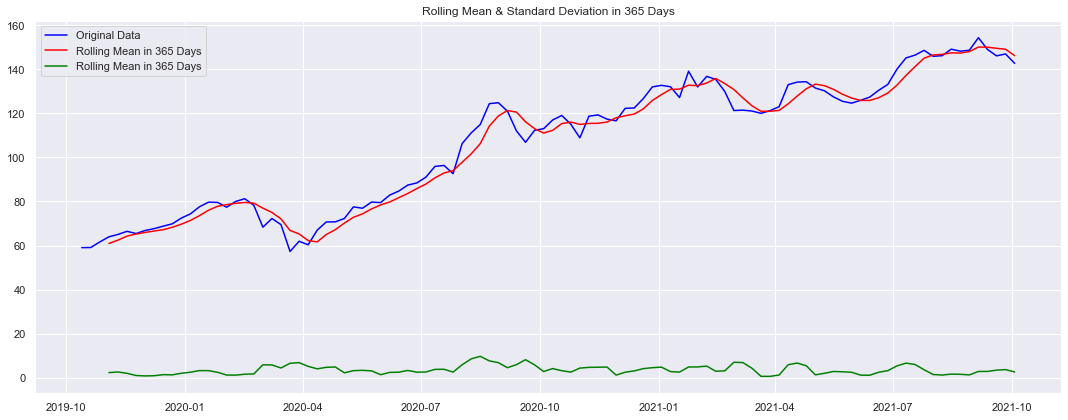

In [12]:
plt.plot(df, color='blue', label='Original Data')
plt.plot(rolling_mean, color='red', label='Rolling Mean in 365 Days')
plt.plot(rolling_std, color='green', label='Rolling Mean in 365 Days')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation in 365 Days')
plt.tight_layout()
plt.show()

In [13]:
from statsmodels.tsa.stattools import adfuller


def stationary_test(data):
    result=adfuller(data)
    labels=['ADF Test Statistic','p-value','Lags Used','Number of Observations Used']
    for key, value in zip(labels, result):
        print(key+' : '+str(value))
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [14]:
stationary_test(df['Close'])

ADF Test Statistic : -1.138616188448227
p-value : 0.6994292113361454
Lags Used : 0
Number of Observations Used : 103
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


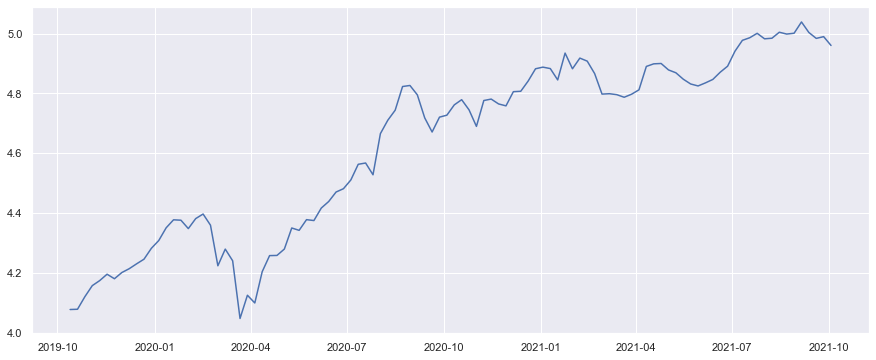

In [15]:
plt.plot(np.log(df))
plt.show()

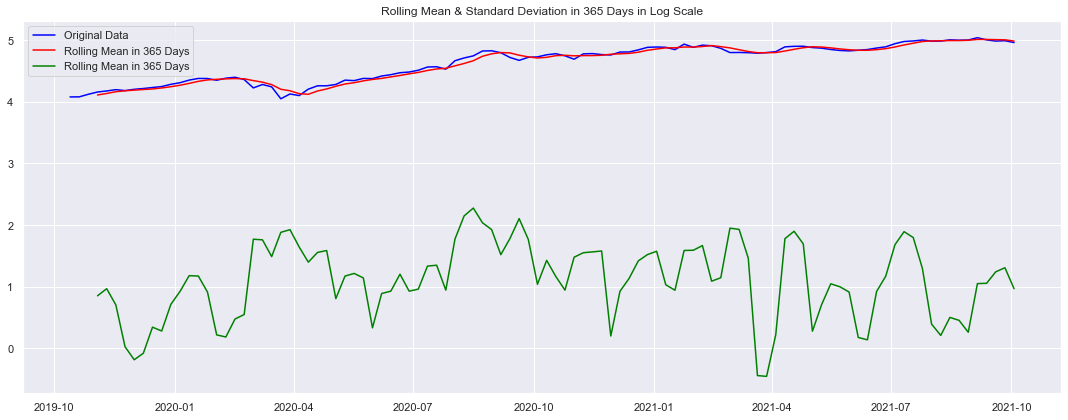

In [16]:
plt.plot(np.log(df), color='blue', label='Original Data')
plt.plot(np.log(rolling_mean), color='red', label='Rolling Mean in 365 Days')
plt.plot(np.log(rolling_std), color='green', label='Rolling Mean in 365 Days')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation in 365 Days in Log Scale')
plt.tight_layout()
plt.show()

In [17]:
df_shift=df-df.shift(1)
stationary_test(df_shift['Close'].dropna())

ADF Test Statistic : -9.71863836954172
p-value : 9.676783876516198e-17
Lags Used : 0
Number of Observations Used : 102
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [18]:
df_shift.head()

Close
Date                
2019-10-13       NaN
2019-10-20  0.049999
2019-10-27  2.542499
2019-11-03  2.310002
2019-11-10  1.080002

In [19]:
df_shift.dropna()

Close
Date                
2019-10-20  0.049999
2019-10-27  2.542499
2019-11-03  2.310002
2019-11-10  1.080002
2019-11-17  1.404998
...              ...
2021-09-05  5.699997
2021-09-12 -5.330002
2021-09-19 -2.910003
2021-09-26  0.860000
2021-10-03 -4.270004

[103 rows x 1 columns]

In [20]:
df_shift.dropna().shape

(103, 1)

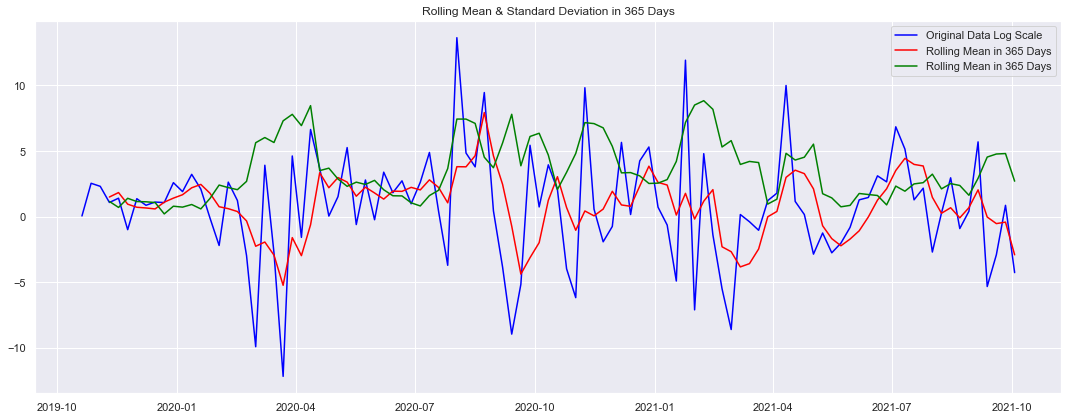

In [21]:
plt.plot(df_shift, color='blue', label='Original Data Log Scale')
plt.plot(df_shift.rolling(window=4).mean(), color='red', label='Rolling Mean in 365 Days')
plt.plot(df_shift.rolling(window=4).std(), color='green', label='Rolling Mean in 365 Days')

plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation in 365 Days')
plt.tight_layout()
plt.show()

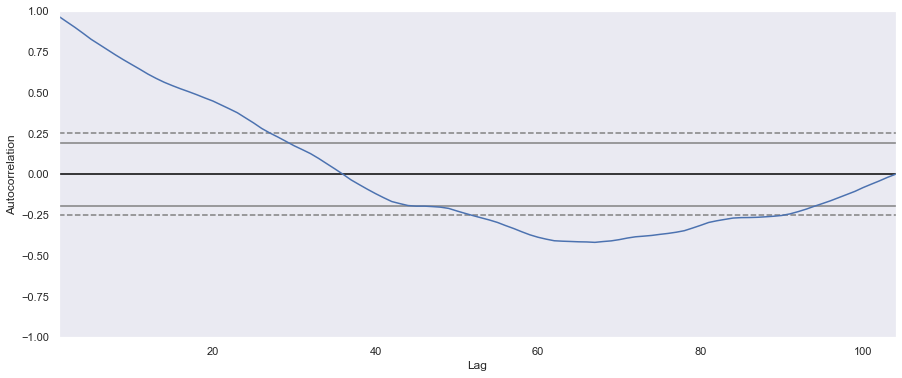

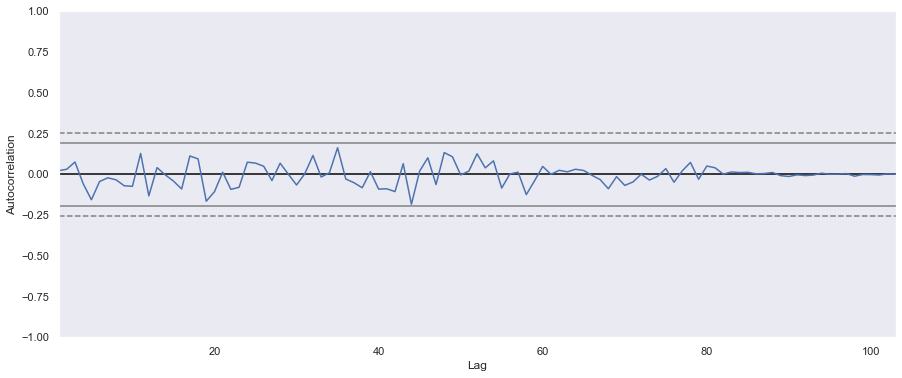

In [22]:
pd.plotting.autocorrelation_plot(df['Close'])
plt.show()
pd.plotting.autocorrelation_plot(df_shift['Close'].dropna())
plt.show()

In [23]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

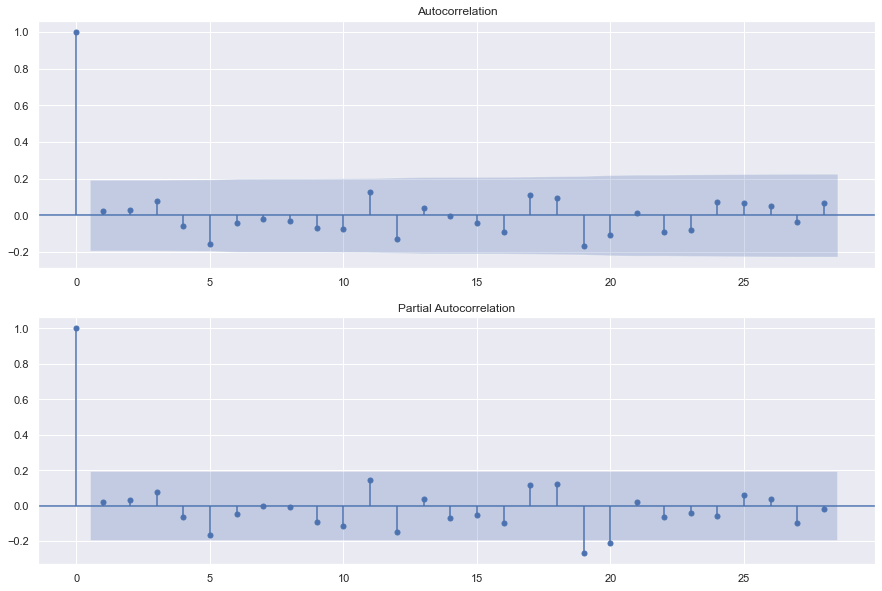

In [24]:
fig=plt.figure(figsize=(15, 10))
ax1=fig.add_subplot(211)
fig=plot_acf(df_shift['Close'].dropna(), lags=28, ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(df_shift['Close'].dropna(), lags=28, ax=ax2)

In [25]:
from statsmodels.tsa.arima_model import ARIMA

In [26]:
df

Close
Date                  
2019-10-13   59.052502
2019-10-20   59.102501
2019-10-27   61.645000
2019-11-03   63.955002
2019-11-10   65.035004
...                ...
2021-09-05  154.300003
2021-09-12  148.970001
2021-09-19  146.059998
2021-09-26  146.919998
2021-10-03  142.649994

[104 rows x 1 columns]

In [27]:
model1=ARIMA(df, order=(3, 1, 3))

In [28]:
result1=model1.fit()
print(result1.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  103
Model:                 ARIMA(3, 1, 3)   Log Likelihood                -292.800
Method:                       css-mle   S.D. of innovations              4.085
Date:                Thu, 14 Oct 2021   AIC                            601.599
Time:                        19:36:13   BIC                            622.677
Sample:                    10-20-2019   HQIC                           610.137
                         - 10-03-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8169      0.439      1.863      0.062      -0.043       1.676
ar.L1.D.Close    -0.4148      0.129     -3.217      0.001      -0.667      -0.162
ar.L2.D.Close    -0.3587      0.107     

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning:

Inverting hessian failed, no bse or cov_params available



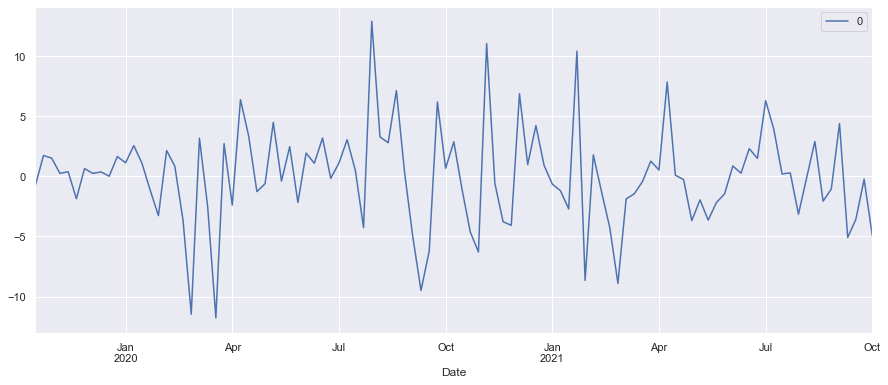

In [29]:
residuals1=pd.DataFrame(result1.resid)
residuals1.plot()
plt.show()

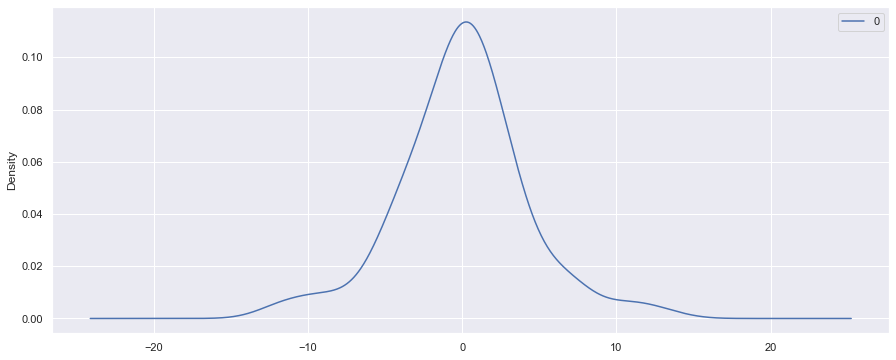

In [30]:
residuals1.plot(kind='kde')
plt.show()

In [31]:
model2=ARIMA(df, order=(1, 1, 1))
result2=model2.fit()
print(result2.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                  103
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -294.680
Method:                       css-mle   S.D. of innovations              4.209
Date:                Thu, 14 Oct 2021   AIC                            597.359
Time:                        19:36:13   BIC                            607.898
Sample:                    10-20-2019   HQIC                           601.628
                         - 10-03-2021                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.8083      0.422      1.914      0.056      -0.019       1.636
ar.L1.D.Close    -0.9635      0.039    -24.557      0.000      -1.040      -0.887
ma.L1.D.Close     0.9993      0.251     

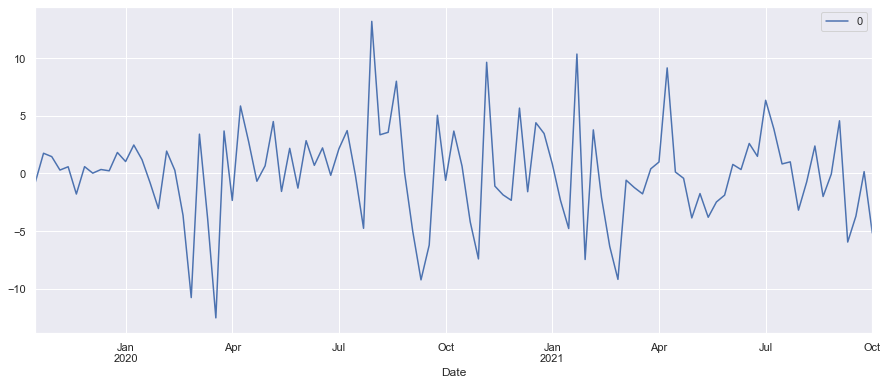

In [32]:
residuals2=pd.DataFrame(result2.resid)
residuals2.plot()
plt.show()

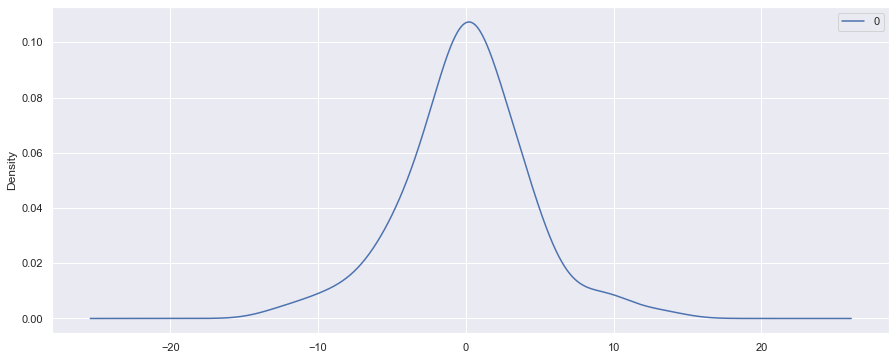

In [33]:
residuals2.plot(kind='kde')
plt.show()

In [34]:
import statsmodels.api as sm
model3=sm.tsa.statespace.SARIMAX(df, order=(3, 1, 3), seasonal_order=(1, 1, 1, 12))
results3=model3.fit()
print(results3.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                  104
Model:             SARIMAX(3, 1, 3)x(1, 1, [1], 12)   Log Likelihood                -267.280
Date:                              Thu, 14 Oct 2021   AIC                            552.560
Time:                                      19:36:16   BIC                            575.158
Sample:                                  10-13-2019   HQIC                           561.677
                                       - 10-03-2021                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2097      2.603      0.081      0.936      -4.892       5.312
ar.L2         -0.72

C:\Users\Admin\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



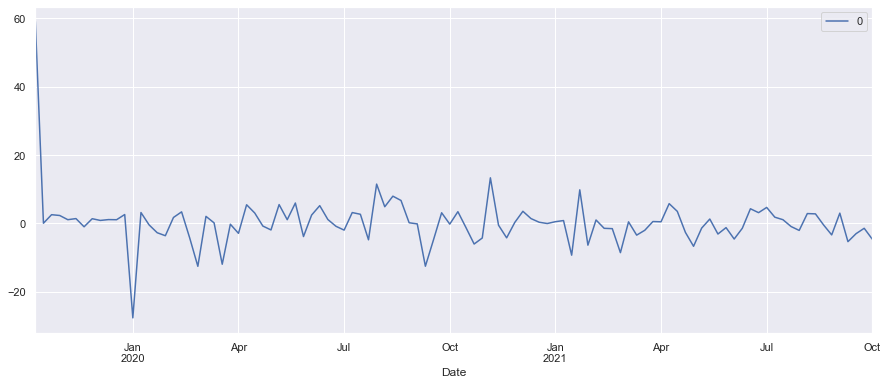

In [35]:
residuals3=pd.DataFrame(results3.resid)
residuals3.plot()
plt.show()

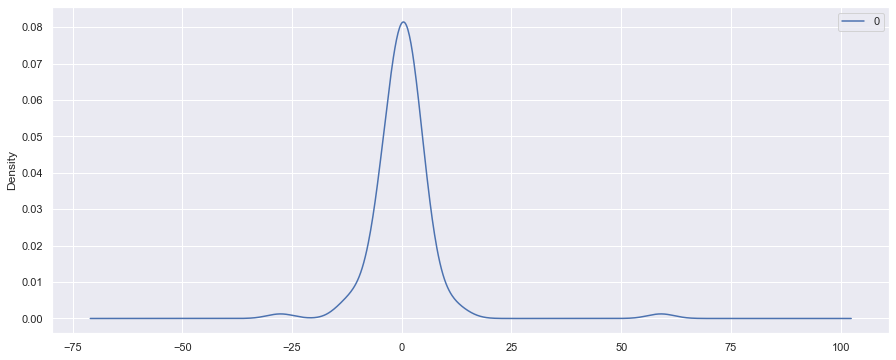

In [36]:
residuals3.plot(kind='kde')
plt.show()

In [37]:
model4=sm.tsa.statespace.SARIMAX(df, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results4=model4.fit()
print(results4.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  104
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -269.663
Date:                            Thu, 14 Oct 2021   AIC                            549.325
Time:                                    19:36:17   BIC                            561.880
Sample:                                10-13-2019   HQIC                           554.390
                                     - 10-03-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5304      1.664      0.319      0.750      -2.732       3.793
ma.L1         -0.4912      1.689   

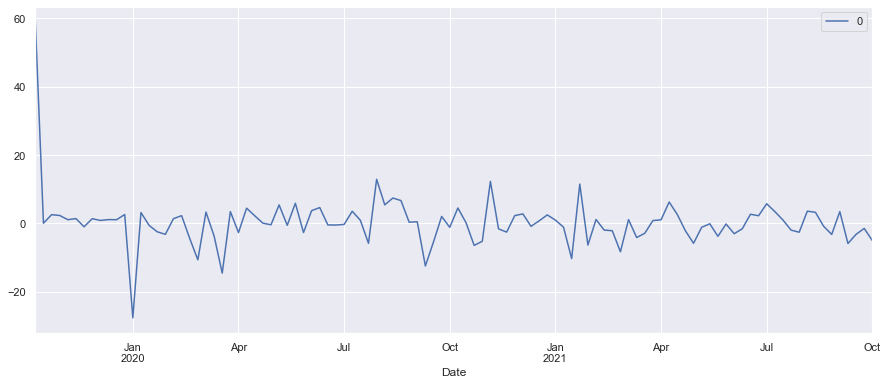

In [38]:
residuals4=pd.DataFrame(results4.resid)
residuals4.plot()
plt.show()

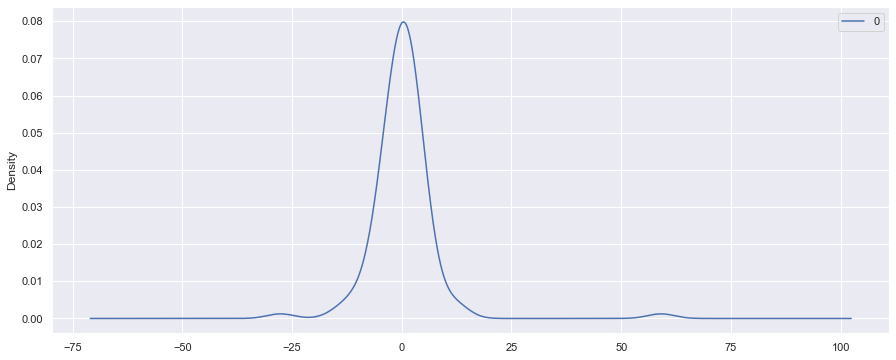

In [39]:
residuals4.plot(kind='kde')
plt.show()

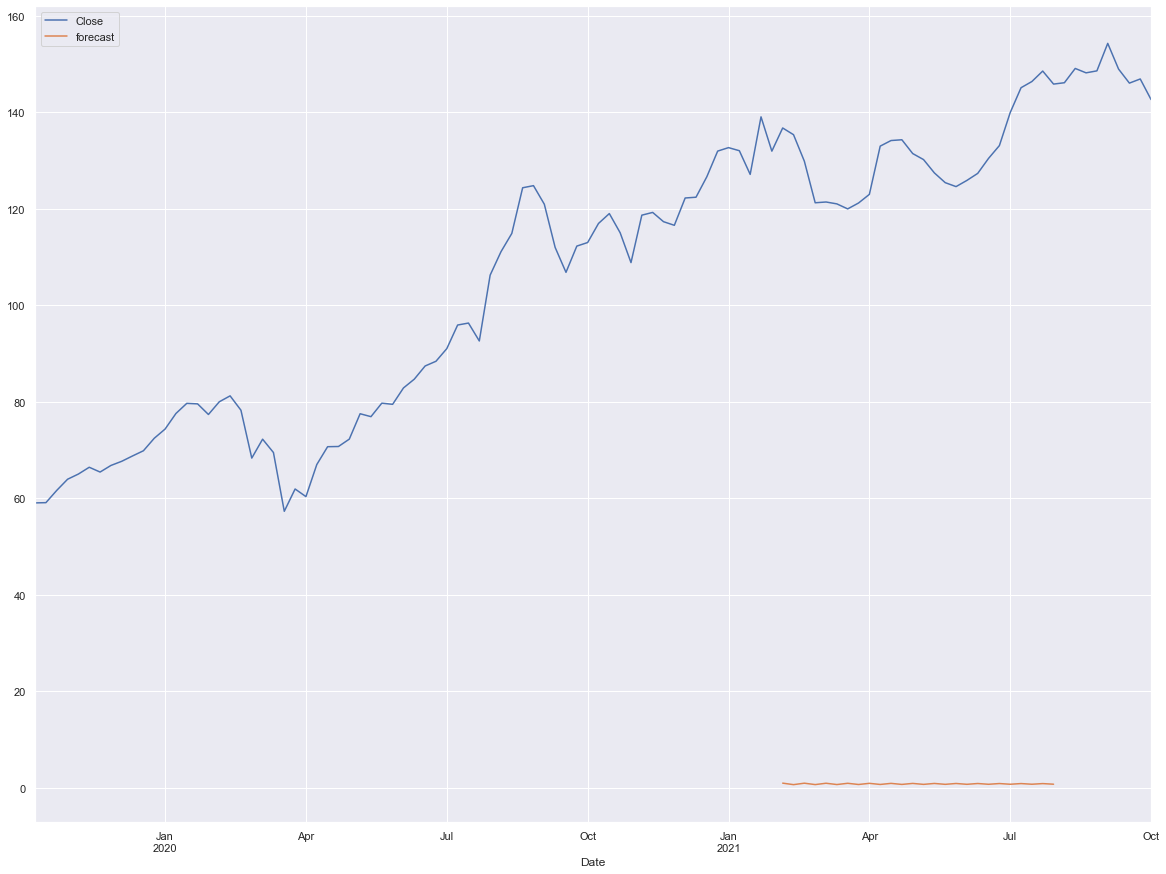

In [40]:
df['forecast']=result2.predict(start=len(df)-35, end=len(df)-10, dynamic=True)
df[['Close', 'forecast']].plot(figsize=(20,15))
plt.show()

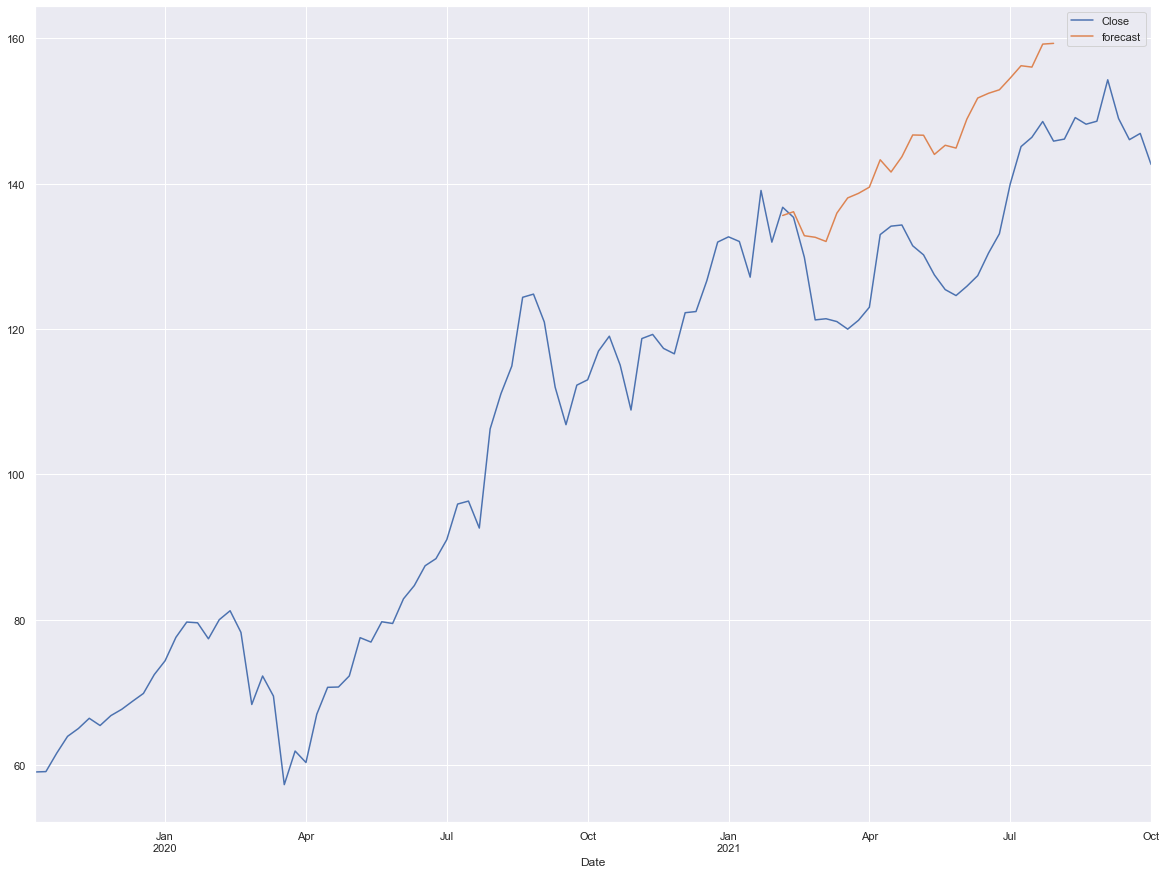

In [41]:
df['forecast']=results4.predict(start=len(df)-35, end=len(df)-10, dynamic=True)
df[['Close', 'forecast']].plot(figsize=(20,15))
plt.show()

In [42]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(weeks=x)for x in range(0, 52)]

In [43]:
future_datest_df=pd.DataFrame(index=future_dates[1:], columns=df.columns)
future_datest_df.tail()

Close forecast
2022-08-28   NaN      NaN
2022-09-04   NaN      NaN
2022-09-11   NaN      NaN
2022-09-18   NaN      NaN
2022-09-25   NaN      NaN

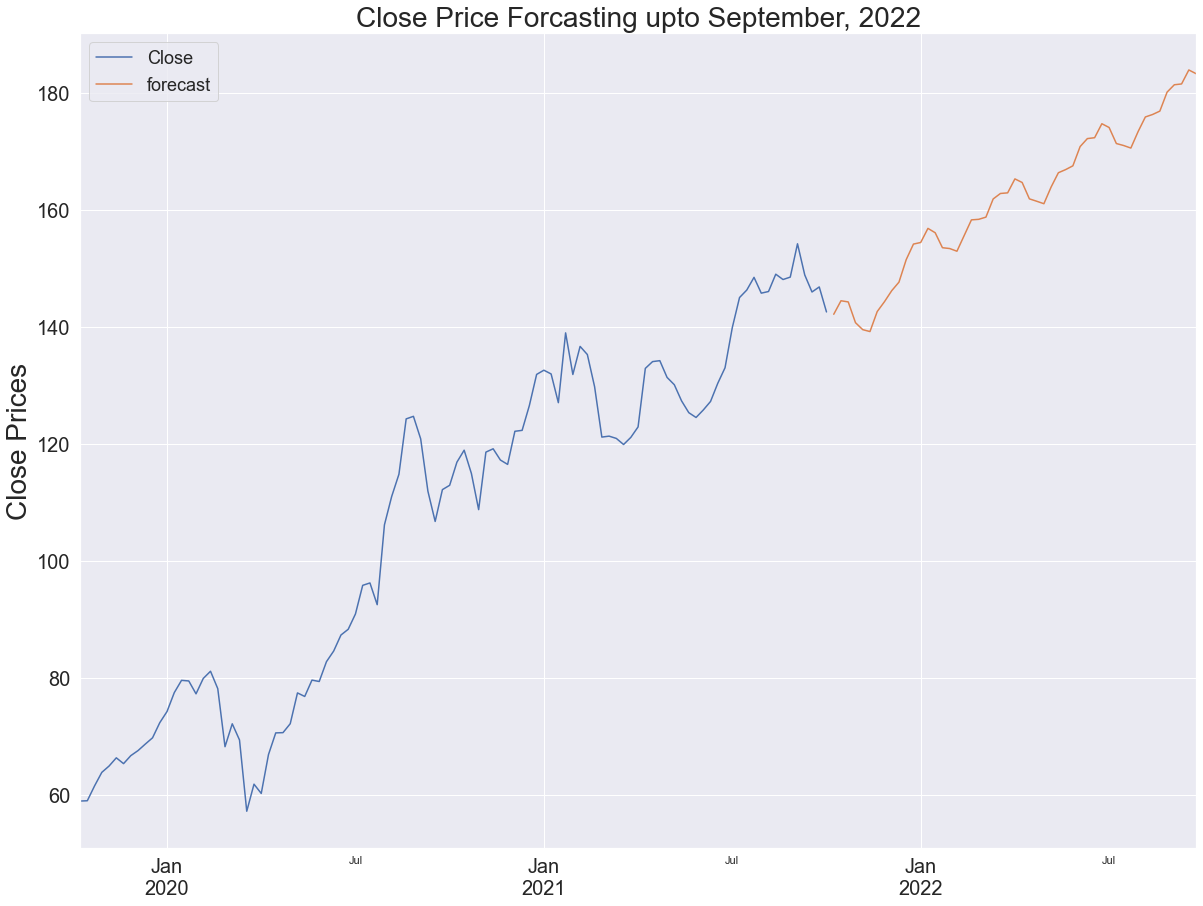

In [44]:
future_df=pd.concat([df,future_datest_df])
future_df['forecast']=results4.predict(start=len(df), end=len(df)+52, dynamic=True)  
future_df[['Close', 'forecast']].plot(figsize=(20, 15))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Close Prices', fontsize=28)
plt.title('Close Price Forcasting upto September, 2022', fontsize=28)
plt.legend(loc='best', prop={'size': 18})
plt.show()

In [45]:
df.shape, future_df.shape

((104, 2), (155, 2))

In [46]:
future_df.tail()

Close    forecast
2022-08-28    NaN  180.220736
2022-09-04    NaN  181.479370
2022-09-11    NaN  181.617062
2022-09-18    NaN  184.007561
2022-09-25    NaN  183.371102

In [47]:
import session_info

In [48]:
session_info.show()